# MA124 Maths by Computer: Assignment 3 
## Part B: Geometric Brownian Motion

Student number: 2106983

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

We consider numerical simulations of the stochastic differential equation for Geometric Brownian Motion given by 

$$
\dot S(t) = \mu S(t) + \sigma S(t) \xi(t)
$$

This equations models Geometric Brownian Motion and can be used to represent the growth of a stock price, $S(t)$.

$S(t)$ is taken to be positive and represents the value of a stock at time $t$ and the second term in the equation describes the fluctuations in the value of a stock and notice it contains $S(t)$ itself. This is equivalent to the fact that fluctuations in a stock price are proportional to the price.

The other notable variables are:

Time $t$ measured in years

$\mu$ - growth rate where $\mu$>0, typical values between 0.01 and 0.1 which corresponds to 1% and 10% annual growth (non-compounded). In my case it will be 0.07.

$\sigma$ - volatility where $\sigma$>0, assumed to be between 0.1 and 0.4. In my case it will be 0.24.

$\xi$(t) - Gaussian random variable.


In [2]:
# Define a function that solves SDEs of this form
def SDE_GBM(S0, tf, mu, sigma, Npaths):
    '''returns time and solution "S" for given arguments'''
    Nsteps=365*tf

# Generate the time grid and solution array
    t, dt = np.linspace(0,tf,Nsteps+1,retstep=True)
    S = np.zeros((Nsteps+1,Npaths))
    root_dt = np.sqrt(dt)
      
# Time step starting from initial condition
    S[0,:] = S0;
    for n in range(Nsteps):
        F_of_X = mu*S[n,:]
        S[n+1,:] =  S[n,:] + dt * F_of_X + sigma *  S[n,:]* root_dt * np.random.randn(Npaths)
    return t, S

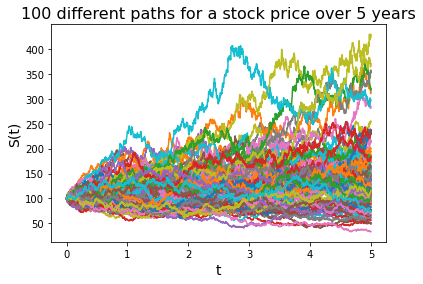

In [3]:
# Set parameters
tf=5
mu=0.07
sigma=0.24
S0=100
Npaths=100

# extract t and S from our function with Npaths=100
t, S= (SDE_GBM(S0, tf, mu, sigma, Npaths))

# plot paths all on the same graph
plt.plot(t, S)
plt.xlabel("t", fontsize=14)
plt.ylabel("S(t)", fontsize=14)
plt.title("100 different paths for a stock price over 5 years", fontsize=16)
plt.show()

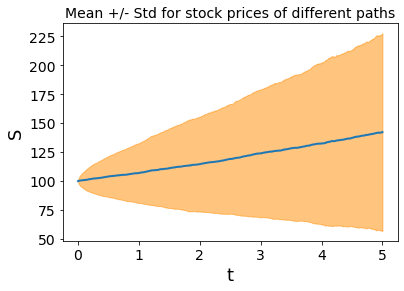

In [4]:
# again extract t and s with the same arguments expect Npaths which is now 2000
Npaths=2000
t, S= (SDE_GBM(S0, tf, mu, sigma, Npaths))

# plot the mean +/- standard deviation as function of time.

# Compute the mean and standard deviation as function of time
S_mean = np.mean(S,1)
S_std = np.std(S,1)

# Plot shaded region between X_mean - X_std and X_mean + X_std 
plt.fill_between(t, 
                 S_mean - S_std, 
                 S_mean + S_std, 
                 alpha=0.5, color="darkorange")

# Plot the mean itself
plt.plot(t,S_mean, linewidth=2)

# labels
plt.xlabel("t", fontsize=18)
plt.ylabel("S", fontsize=18)
plt.title("Mean +/- Std for stock prices of different paths", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

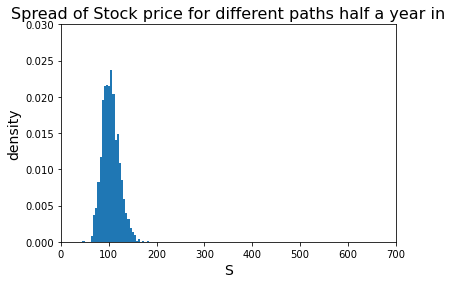

The mean half a year in is 103.98000712425183
The standard deviation half a year in is 17.63836480417516



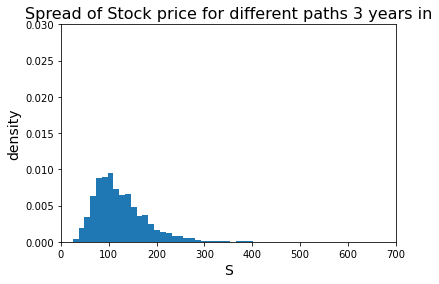

The mean 3 years in is 123.87770049619218
The standard deviation 3 years in is 55.05898094241424



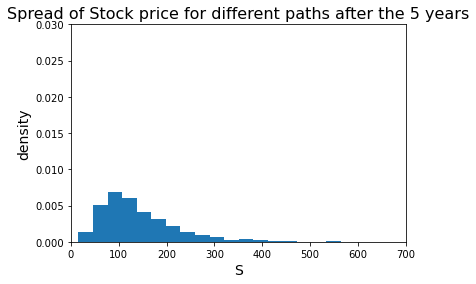

The mean after 5 years is 142.28492170393915
The standard deviation after 5 years is 85.27343191390311


In [5]:
# Plot histograms showing the spread of the price of different paths at separate times

# Plot first histogram half a year in
plt.hist(S[182,:], bins=31, density=True)
plt.xlim(0,700)
plt.ylim(0,0.03)
plt.xlabel("S",fontsize=14)
plt.ylabel("density",fontsize=14)
plt.title("Spread of Stock price for different paths half a year in", fontsize=16)
plt.show()

# Print mean and standard deviation
print("The mean half a year in is",np.mean(S[182,:]))
print("The standard deviation half a year in is",np.std(S[182,:]))
print()

# Plot second histogram 3 years in
plt.hist(S[1095,:], bins=31, density=True)
plt.xlim(0,700)
plt.ylim(0,0.03)
plt.xlabel("S",fontsize=14)
plt.ylabel("density",fontsize=14)
plt.title("Spread of Stock price for different paths 3 years in", fontsize=16)
plt.show()

# Print mean and standard deviation
print("The mean 3 years in is",np.mean(S[1095,:]))
print("The standard deviation 3 years in is",np.std(S[1095,:]))
print()

# Plot final histogram at the end of the 5 years
plt.hist(S[-1,:], bins=31, density=True)
plt.xlim(0,700)
plt.ylim(0,0.03)
plt.xlabel("S",fontsize=14)
plt.ylabel("density",fontsize=14)
plt.title("Spread of Stock price for different paths after the 5 years", fontsize=16)
plt.show()

# Print mean and standard deviation
print("The mean after 5 years is",np.mean(S[-1,:]))
print("The standard deviation after 5 years is",np.std(S[-1,:]))

In [6]:
def lognorm_cdf(x, mu, sigma):
    shape  = sigma
    loc    = 0
    scale  = exp(mu)
    return lognorm.cdf(x, shape, loc, scale)

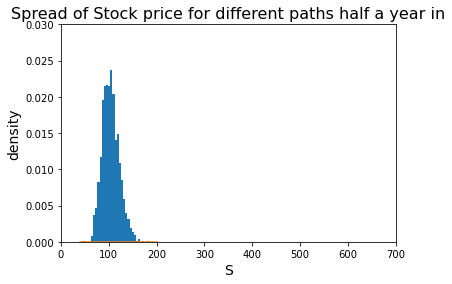

The mean half a year in is 103.98000712425183
The standard deviation half a year in is 17.63836480417516



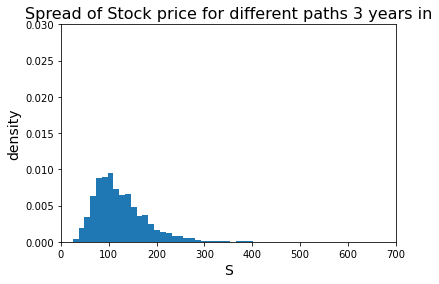

The mean 3 years in is 123.87770049619218
The standard deviation 3 years in is 55.05898094241424



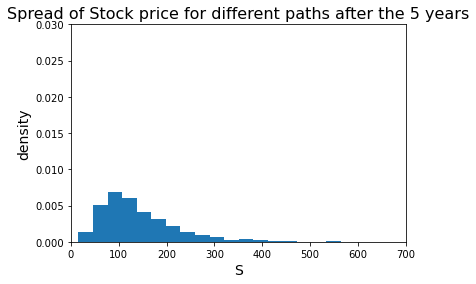

The mean after 5 years is 142.28492170393915
The standard deviation after 5 years is 85.27343191390311


In [14]:
# Plot histograms showing the spread of the price of different paths at separate times

# Plot first histogram half a year in
plt.hist(S[182,:], bins=31, density=True)
plt.xlim(0,700)
plt.ylim(0,0.03)
plt.xlabel("S",fontsize=14)
plt.ylabel("density",fontsize=14)
plt.title("Spread of Stock price for different paths half a year in", fontsize=16)
mean=(np.log([S0])[0]+mu-(sigma**2)/2)
std=sigma
dist=lognorm(s=std,scale=np.exp(mean))
# Plot lognormal distribution on same plot, with the shape, loc and scale computed half a year in
x=np.linspace(40,200,1001)
y=dist.pdf(x)
plt.plot(x,y)
plt.show()

# Print mean and standard deviation
print("The mean half a year in is",np.mean(S[182,:]))
print("The standard deviation half a year in is",np.std(S[182,:]))
print()

# Plot second histogram 3 years in
plt.hist(S[1095,:], bins=31, density=True)
plt.xlim(0,700)
plt.ylim(0,0.03)
plt.xlabel("S",fontsize=14)
plt.ylabel("density",fontsize=14)
plt.title("Spread of Stock price for different paths 3 years in", fontsize=16)

# Plot normal distribution on same plot, with the mean and standard deviation computed 3 years in
x=np.linspace(20,370,1001)
#y=lognorm.pdf(x,np.mean(S[1095,:]),np.std(S[1095,:]))
#plt.plot(x,y)
plt.show()

# Print mean and standard deviation
print("The mean 3 years in is",np.mean(S[1095,:]))
print("The standard deviation 3 years in is",np.std(S[1095,:]))
print()

# Plot final histogram at the end of the 5 years
plt.hist(S[-1,:], bins=31, density=True)
plt.xlim(0,700)
plt.ylim(0,0.03)
plt.xlabel("S",fontsize=14)
plt.ylabel("density",fontsize=14)
plt.title("Spread of Stock price for different paths after the 5 years", fontsize=16)

# Plot normal distribution on same plot, with the mean and standard deviation computed after 5 years
#x=np.linspace(10,700,1001)
#y=lognorm.pdf(x,np.mean(S[-1,:]),np.std(S[-1,:]))
#plt.plot(x,y)
plt.show()

# Print mean and standard deviation
print("The mean after 5 years is",np.mean(S[-1,:]))
print("The standard deviation after 5 years is",np.std(S[-1,:]))

